In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/df_final_csv.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'date_1', 'date_2', 'station', 'PM2.5', 'PM10', 'NO',
       'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'WS', 'WD',
       'TOT-RF', 'PM10_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg',
       'NOx_24hr_avg', 'NH3_24hr_avg', 'CO_8hr_max', 'Ozone_8hr_max',
       'PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 'NH3_μg', 'Ozone_μg',
       'CO_μg', 'Checks', 'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [ ]:
corr_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
             'SO2', 'CO', 'Ozone', 'Benzene', 'WS', 'WD',
             'station', 'PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg',
             'NH3_μg', 'Ozone_μg', 'CO_μg', 'AQI_calculated', 'AQI_bucket_calculated']
data = df[corr_cols]

In [ ]:
data.head(n=3)


,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,station,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,AQI_calculated,AQI_bucket_calculated
0,81.27,251.0,74.94,50.55,125.48,40.01,9.95,1.87,6.76,0.05,...,airport,0.0,0.0,0.0,0.0,0.0,6.76,93.5,0,0
1,81.00,251.0,75.58,49.01,124.60,41.14,11.93,1.93,3.44,0.19,...,airport,0.0,0.0,0.0,0.0,0.0,6.76,96.5,0,0
2,81.00,251.0,86.29,45.26,131.55,40.99,12.48,1.97,3.39,0.38,...,airport,0.0,0.0,0.0,0.0,0.0,6.76,98.5,0,0


In [ ]:


# Calculate the correlation matrix
corr = data.corr(numeric_only=True)

# Create the heatmap
fig = px.imshow(corr, color_continuous_scale='Greens')

# Add text annotations for each cell in the matrix
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = np.round(corr.iloc[i, j], 4)
        if val > 0.8:
            color = 'red'
        else:
            color = 'black'
        fig.add_annotation(x=j, y=i, text=val, font=dict(color=color))

# Set the size of the heatmap
fig.update_layout(width=1400, height=1400)
fig.show()
# Save the visualization as an HTML file
fig.write_html('corr_heatmap.html')

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

data = df
columns = ['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg']
for i, column in enumerate(columns):
    fig = px.scatter(data, x=column, y="AQI_calculated",
                    color="AQI_bucket_calculated", symbol="station",
                    size_max=10, height=500)
    fig.update_layout(title="AQI vs " + column,
                    xaxis_title=column + " (μg/m3)",
                    yaxis_title="AQI",
                    font=dict(family="Arial", size=18),
                    legend=dict(font=dict(family="Arial", size=14)),
                    margin=dict(l=50, r=50, t=50, b=50))
    plt.subplot(2, 2, i+1)

    fig.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/df_final_csv.csv")


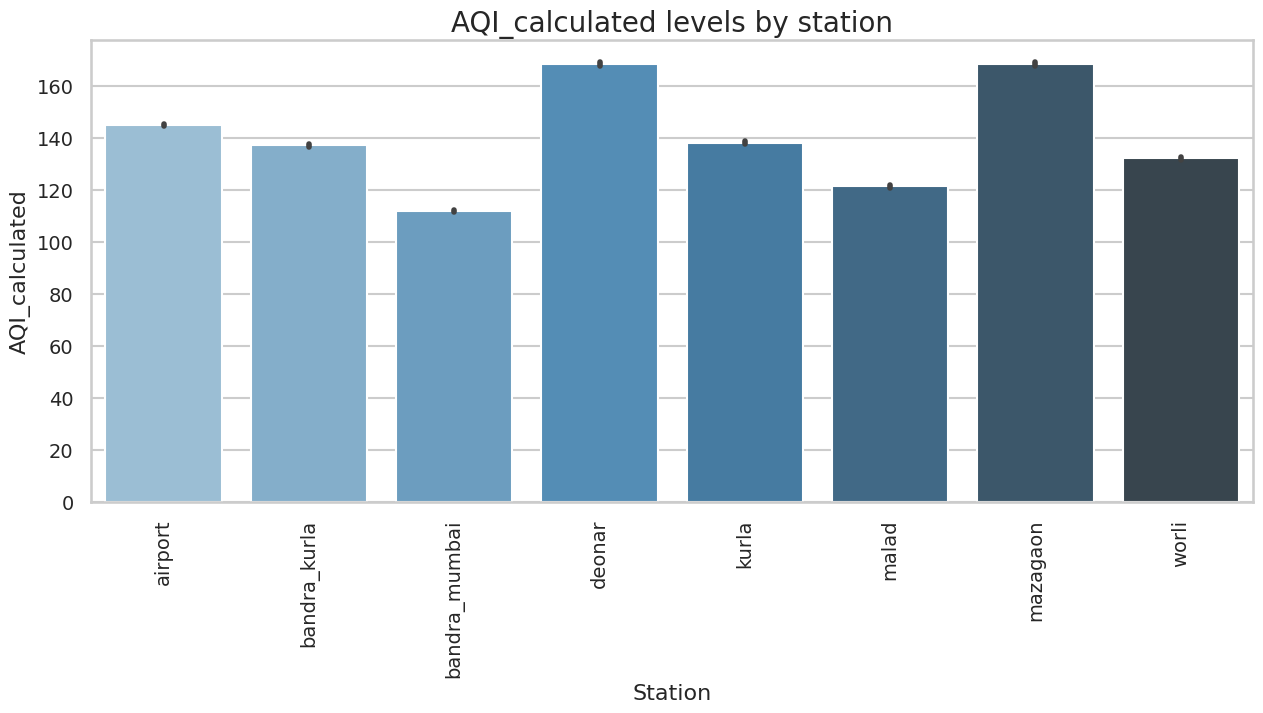

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Figure 3
fig1 = plt.figure(figsize=(15, 6))
ax = sns.barplot(x='station', y='AQI_calculated', data=df, palette='Blues_d')

# Set title and axis labels
ax.set_title('AQI_calculated levels by station', fontsize=20)
ax.set_xlabel('Station', fontsize=16)
ax.set_ylabel('AQI_calculated', fontsize=16)

# Set tick labels font size
ax.tick_params(labelsize=14)

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Save the figure as a JPEG file
fig1.savefig('figure1.jpg', dpi=300, bbox_inches='tight')

plt.show()



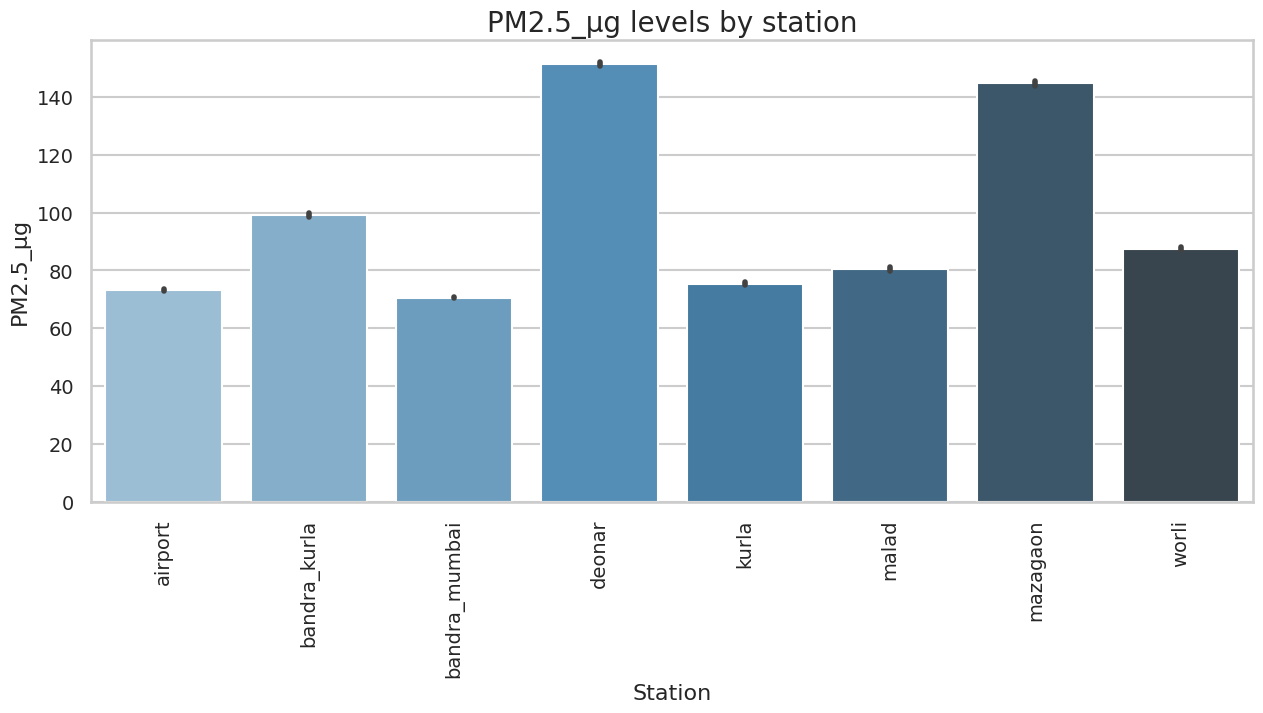

In [ ]:
# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Figure 2
fig2 = plt.figure(figsize=(15, 6))
ax = sns.barplot(x='station', y='PM2.5_μg', data=df, palette='Blues_d')

# Set title and axis labels
ax.set_title('PM2.5_μg levels by station', fontsize=20)
ax.set_xlabel('Station', fontsize=16)
ax.set_ylabel('PM2.5_μg', fontsize=16)

# Set tick labels font size
ax.tick_params(labelsize=14)

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Save the figure as a JPEG file
fig2.savefig('figure2.jpg', dpi=300, bbox_inches='tight')

plt.show()

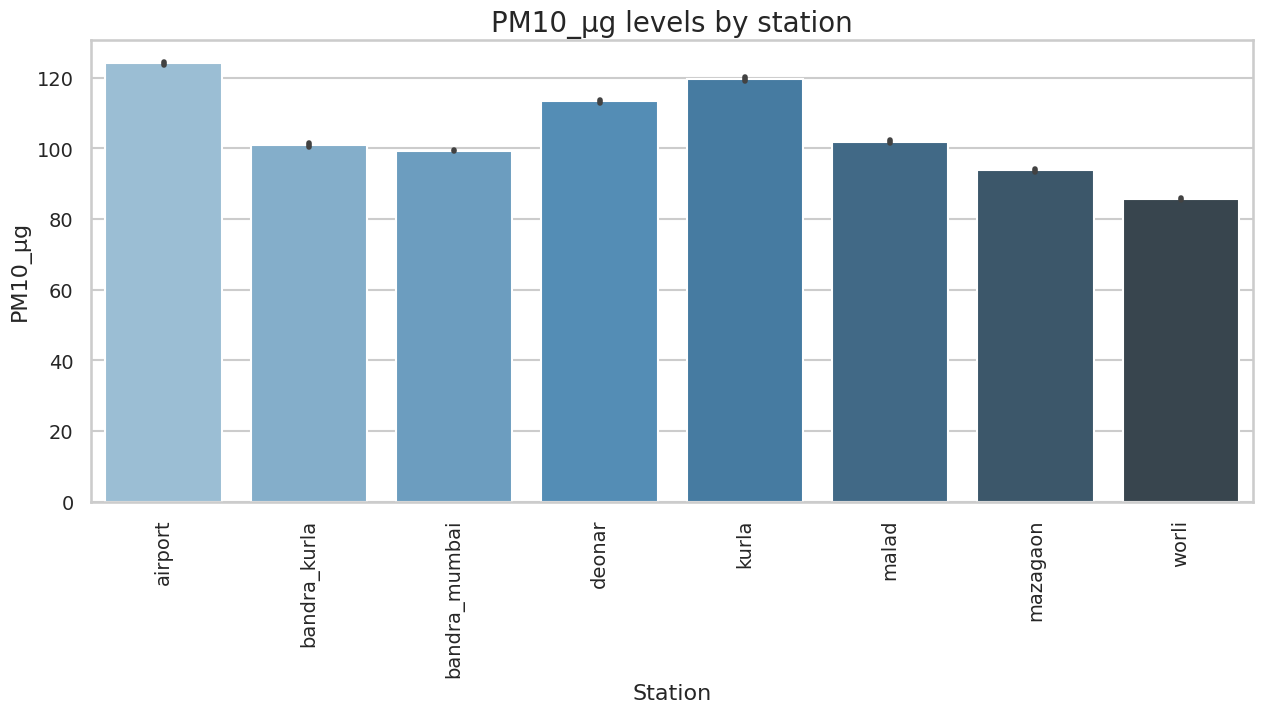

In [ ]:
# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Figure 3
fig3 = plt.figure(figsize=(15, 6))
ax = sns.barplot(x='station', y='PM10_μg', data=df, palette='Blues_d')

# Set title and axis labels
ax.set_title('PM10_μg levels by station', fontsize=20)
ax.set_xlabel('Station', fontsize=16)
ax.set_ylabel('PM10_μg', fontsize=16)

# Set tick labels font size
ax.tick_params(labelsize=14)

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Save the figure as a JPEG file
fig3.savefig('figure3.jpg', dpi=300, bbox_inches='tight')

plt.show()

## Pie charts

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you already have a DataFrame called "df"
explode = [0.1, 0, 0, 0, 0]

# Group by station and sum PM2.5 values
df_station = df.groupby('station')['PM2.5_μg'].sum().reset_index()

# Create a Pie chart with a title
fig = go.Figure(data=[go.Pie(
    labels=df_station['station'],
    values=df_station['PM2.5_μg'],
    hoverinfo='label+value+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['#FFA07A','#20B2AA','#87CEFA','#9370DB','#F08080']),
    hole=0.3
)])
fig.update_layout(title_text='PM2.5 Concentrations by Station')

fig.show()
fig.write_html('pie_chart1.html')


In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you already have a DataFrame called "df"
explode = [0.1, 0, 0, 0, 0]

# Group by station and sum PM2.5 values
df_station = df.groupby('station')['PM10_μg'].sum().reset_index()

# Create a Pie chart
fig = go.Figure(data=[go.Pie(
    labels=df_station['station'],
    values=df_station['PM10_μg'],
    hoverinfo='label+value+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['#FFA07A','#20B2AA','#87CEFA','#9370DB','#F08080']),
    hole=0.3
)])
fig.update_layout(title_text='PM10 Concentrations by Station')

fig.show()
fig.write_html('pie_chart2.html')

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you already have a DataFrame called "df"
explode = [0.1, 0, 0, 0, 0]

# Group by station and sum PM2.5 values
df_station = df.groupby('station')['Ozone_μg'].sum().reset_index()

# Create a Pie chart
fig = go.Figure(data=[go.Pie(
    labels=df_station['station'],
    values=df_station['Ozone_μg'],
    hoverinfo='label+value+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['#FFA07A','#20B2AA','#87CEFA','#9370DB','#F08080']),
    hole=0.3
)])
fig.update_layout(title_text='Ozone Concentrations by Station')

fig.show()
fig.write_html('pie_chart3.html')

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you already have a DataFrame called "df"
explode = [0.1, 0, 0, 0, 0]

# Group by station and sum PM2.5 values
df_station = df.groupby('station')['NOx_μg'].sum().reset_index()

# Create a Pie chart
fig = go.Figure(data=[go.Pie(
    labels=df_station['station'],
    values=df_station['NOx_μg'],
    hoverinfo='label+value+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['#FFA07A','#20B2AA','#87CEFA','#9370DB','#F08080']),
    hole=0.3
)])
fig.update_layout(title_text='NOx Concentrations by Station')

fig.show()
fig.write_html('pie_chart4.html')

In [ ]:
import plotly.graph_objects as go

columns = ['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg',           'NH3_μg', 'Ozone_μg', 'CO_μg', 'AQI_calculated']

fig = go.Figure()
for column in columns:
    fig.add_trace(go.Scatter(x=data[''], y=data[column],
                             mode='lines', name=column))

fig.update_layout(title='Monthly Pollutant Levels', xaxis_title='Month', yaxis_title='Pollutant Level')
fig.show()


In [ ]:
df_year_pollutant=df[['date_1', 'PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 'NH3_μg',
       'Ozone_μg', 'CO_μg', 'AQI_calculated']]

In [ ]:
df_year_pollutant.head()

,date_1,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,AQI_calculated
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.76,93.500,0
1,2021-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,6.76,96.500,0
2,2021-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,6.76,98.500,0
3,2021-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,6.76,100.125,0
4,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,6.76,100.625,0


In [ ]:
df_year_pollutant['date_1'] = pd.to_datetime(df_year_pollutant['date_1'])

df_year_pollutant['year'] = df_year_pollutant['date_1'].dt.year
df_year_pollutant['month'] = df_year_pollutant['date_1'].dt.month


<ipython-input-159-25e6acce5ba0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-25e6acce5ba0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-25e6acce5ba0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_year_pollutant.head()


,date_1,PM2.5_μg,PM10_μg,SO2_μg,NOx_μg,NH3_μg,Ozone_μg,CO_μg,AQI_calculated,year,month
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.76,93.500,0,2021,1
1,2021-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,6.76,96.500,0,2021,1
2,2021-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,6.76,98.500,0,2021,1
3,2021-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,6.76,100.125,0,2021,1
4,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,6.76,100.625,0,2021,1


In [ ]:
df_year_pollutant.index[df['station'] == 'deonar']


Int64Index([229159, 229160, 229161, 229162, 229163, 229164, 229165, 229166,
            229167, 229168,
            ...
            305470, 305471, 305472, 305473, 305474, 305475, 305476, 305477,
            305478, 305479],
           dtype='int64', length=76321)

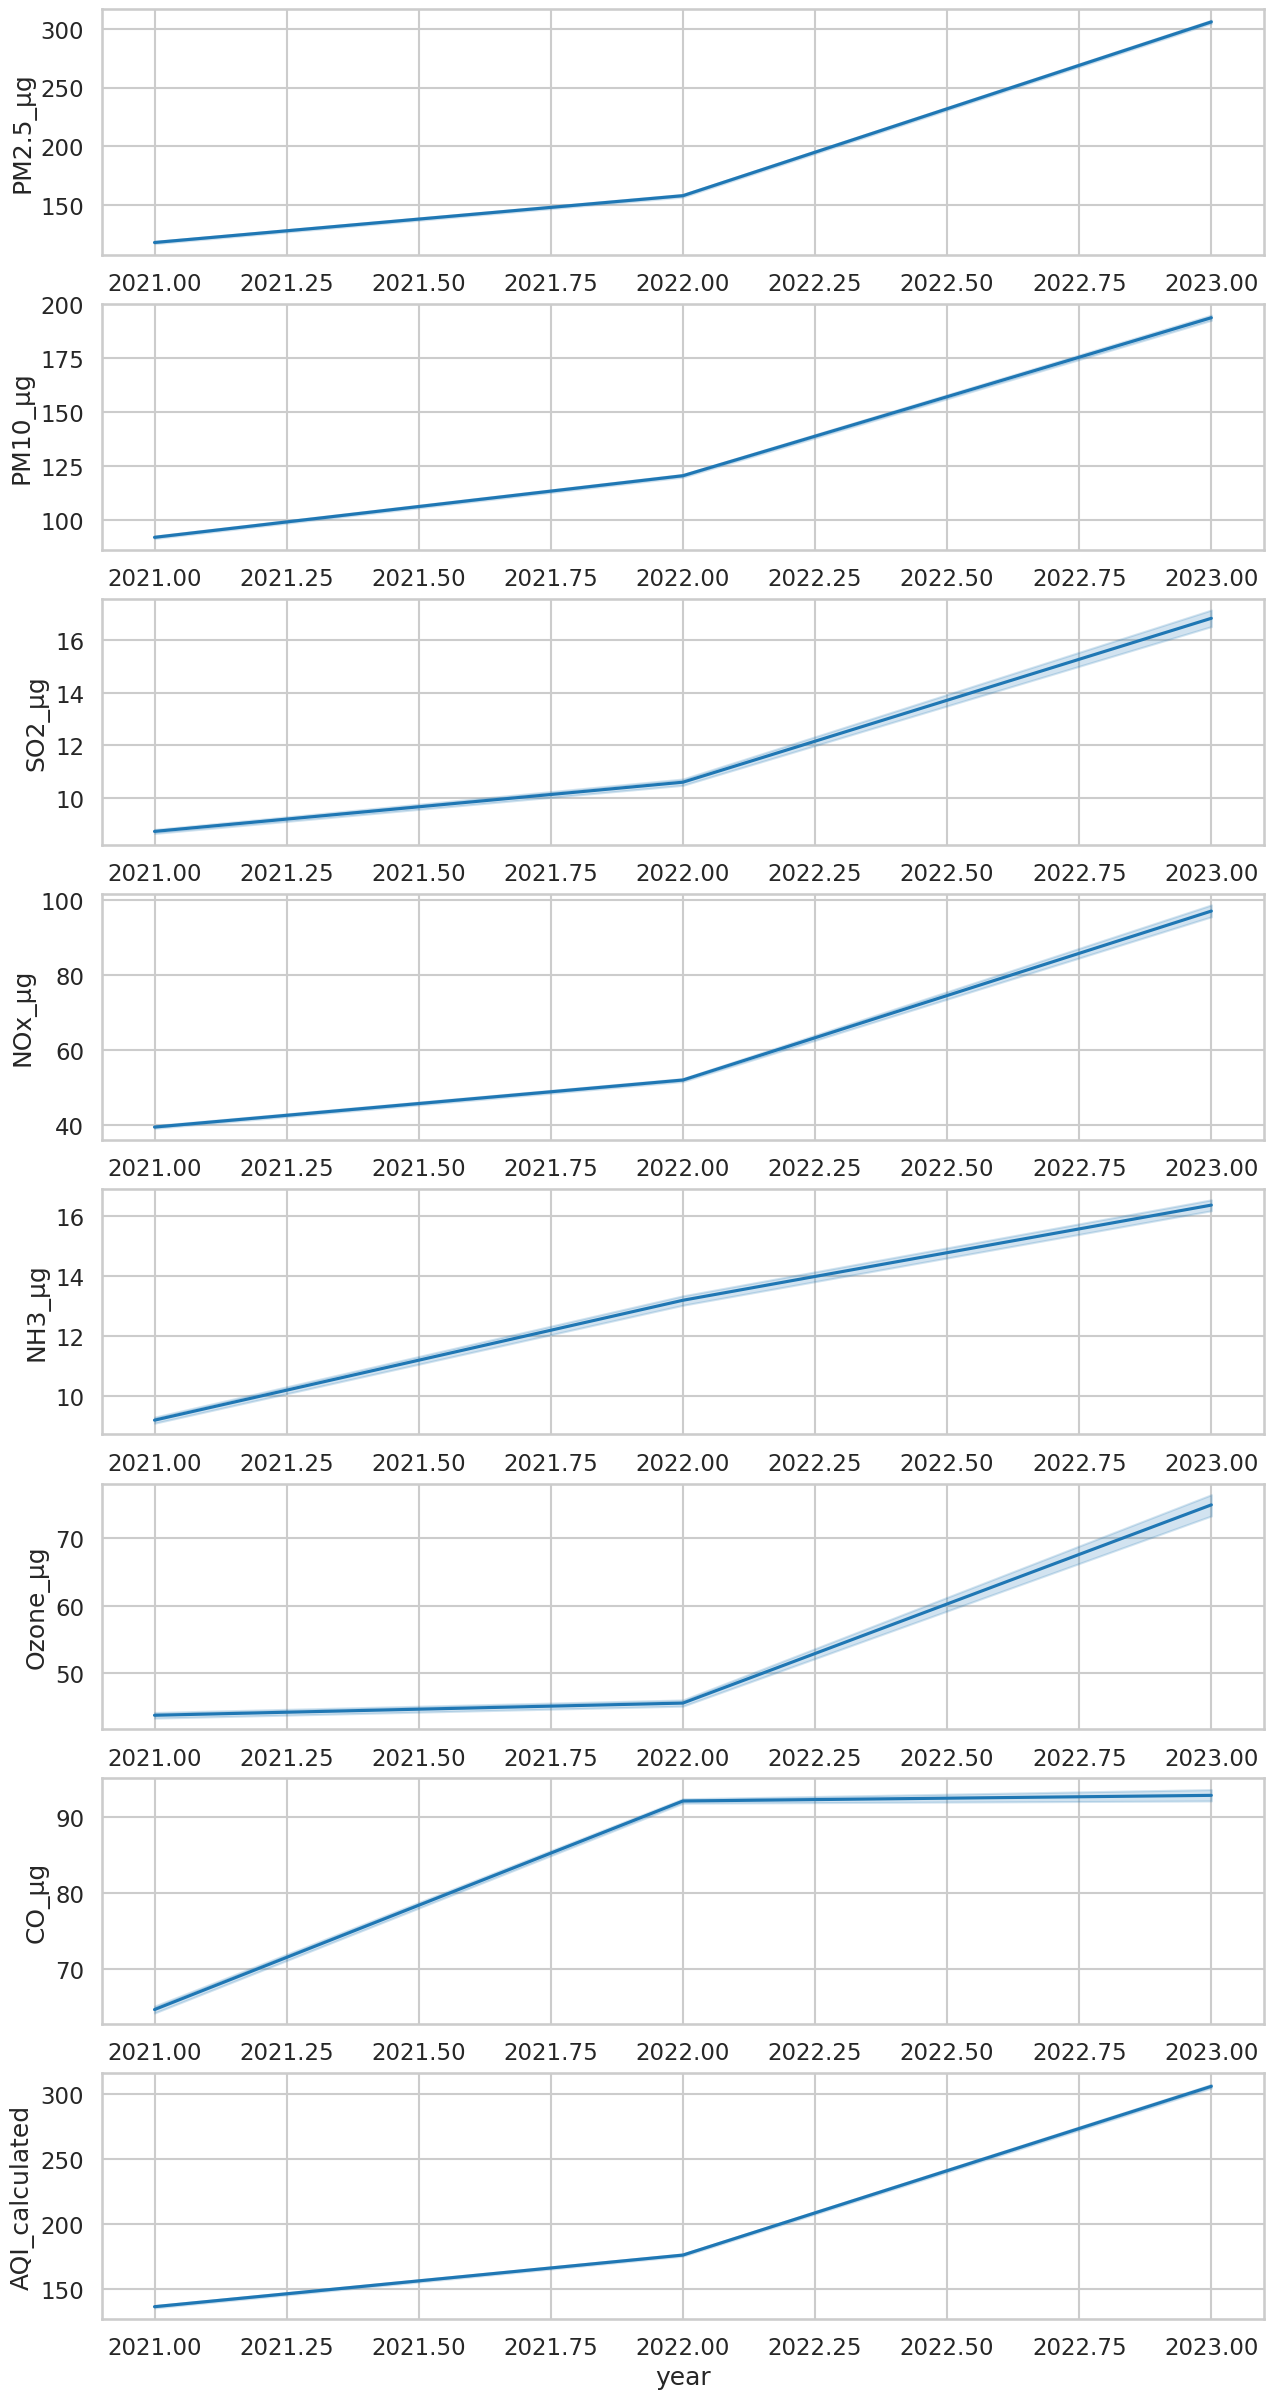

In [ ]:

plt.figure(figsize=(15, 30))

columns = ['PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg', 'NH3_μg', 'Ozone_μg', 'CO_μg', 'AQI_calculated']

for i, column in enumerate(columns):
    plt.subplot(8, 1, i+1)

    # Plot the responses for different events and regions
    sns.lineplot(x="year", y=column, data=df_year_pollutant[229159:305479])

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=1, subplot_titles=('PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg',
                                                    'NH3_μg', 'Ozone_μg', 'CO_μg', 'AQI_calculated'))

for i, column in enumerate(columns):
    fig.add_trace(go.Scatter(x=df_year_pollutant[229159:305479]['year'], y=df_year_pollutant[229159:305479][column], mode='markers', name=column), row=i+1, col=1)
    fig.update_yaxes(title_text=column, row=i+1, col=1)

fig.update_layout(height=2400, width=1000, title='Pollutant Trends by Year')

fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df_year_pollutant[229159:305479], x='year', y='PM2.5_μg',
                 size='AQI_calculated', color='AQI_calculated',
                 hover_name='date_1', opacity=0.8,
                 title='PM2.5 vs Year')
fig.update_layout(width=1000, height=600)
fig.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=1, subplot_titles=('PM2.5_μg', 'PM10_μg', 'SO2_μg', 'NOx_μg',
                                                    'NH3_μg', 'Ozone_μg', 'CO_μg', 'AQI_calculated'))

for i, column in enumerate(columns):
    fig.add_trace(go.Box(y=df_year_pollutant[229159:305479][column], name=column), row=i+1, col=1)
    fig.update_yaxes(title_text=column, row=i+1, col=1)

fig.update_layout(height=2400, width=1000, title='Pollutant Trends by Year')

fig.show()
